## 課題3-6 回答例

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rng= np.random.default_rng();

In [3]:
df = pd.read_csv('SampleData.csv')  #csvデータをDataFrameへ読み込み

x= df['T_Tokyo'].values  #DataFrameの指定列を1次元numpy配列xに変換
y= df['T_Maebashi'].values  #DataFrameの指定列を1次元numpy配列yに変換

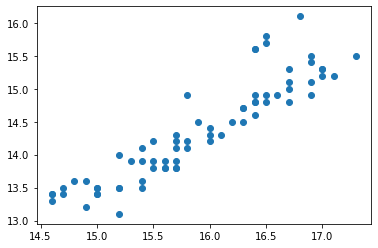

In [4]:
plt.scatter(x,y)

In [5]:
r= np.corrcoef(x,y)[0,1] # この例では統計量RはX,Yの相関係数とした

In [6]:
B=50000
rp= np.empty(B)
xp=x
for j in range(0,B): 
    rng.shuffle(xp)
    rp[j]=np.corrcoef(xp,y)[0,1]

In [7]:
if r > 0:
    pval= np.count_nonzero(rp > r)/B
else:
    pval= np.count_nonzero(rp < r)/B

print("p value =", pval)

p value = 0.0


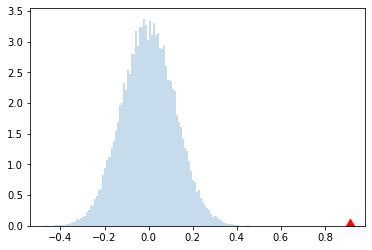

In [8]:
plt.hist(rp,bins=100,density=True,alpha=0.25) #帰無仮説が正しい（相関がない）ときのRの確率密度分布
plt.scatter(r,0,color="red",marker="d",s=100) # Rの実現値の位置